In [1]:
using Plots, Printf, DelimitedFiles, BenchmarkTools
using Revise
using MDToolbox
ENV["COLUMNS"] = 130

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


130

In [2]:
q_array = readdlm("data/quaternion/QUATERNION_LIST_576_Orient");

In [3]:
model_array = readpdb("data/t1r/cluster.pdb");
for iatom = 1:model_array.natom
    model_array.atomname[iatom] = model_array.resname[iatom]
end
model_array = model_array[2:2:50, :]

25x1044 TrjArray{Float64,Int64}
| X                          | X                          |  …   X                          | X                          |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
|   124.28    93.08   -12.36 |   123.45    91.84    -9.13 |  …     204.75   148.42    18.59 |   207.50   151.03    18.92 |
|   126.61    98.55   -14.33 |   125.41    95.98   -11.93 |        179.36   149.81   -35.57 |   181.71   146.56   -36.55 |
|   128.01    97.76   -15.45 |   127.61    95.04   -12.88 |        208.07   132.82   -14.23 |   207.56   130.09   -11.50 |
|   125.59    91.47   -14.13 |   127.36    95.02   -12.88 |        201.26   157.14   -15.64 |   203.43   157.12   -12.80 |
|   125.54    96.57   -11.52 |   124.68    94.07    -8.90 |        209.63   139.51     4.18 |   212.71   14

In [4]:
MDToolbox.decenter!(model_array)

In [5]:
#model_rotated = MDToolbox.rotate(model_array[1, :], q_array[100, :])
#observed = afmize(model_rotated, AfmizeConfig(10.0 * (pi / 180), 30.0, MDToolbox.Point2D(-250, -200), MDToolbox.Point2D(250, 200), MDToolbox.Point2D(6.25, 6.25), MDToolbox.defaultParameters()))
#observed = translateafm(observed, (2, 3))
#heatmap(observed)

In [6]:
param_array = [];
for r in [30.0]
  param_array = [param_array; AfmizeConfig(10.0 * (pi / 180), r, MDToolbox.Point2D(-250, -200), MDToolbox.Point2D(250, 200), MDToolbox.Point2D(6.25, 6.25), MDToolbox.defaultParameters())]
end

In [8]:
asd = readasd("data/t1r/201711020044.asd");

In [9]:
afm_frames = []
for i = 1:length(asd.frames)
    push!(afm_frames, asd.frames[i].data)
end
afm_frames = afm_frames[1:100];

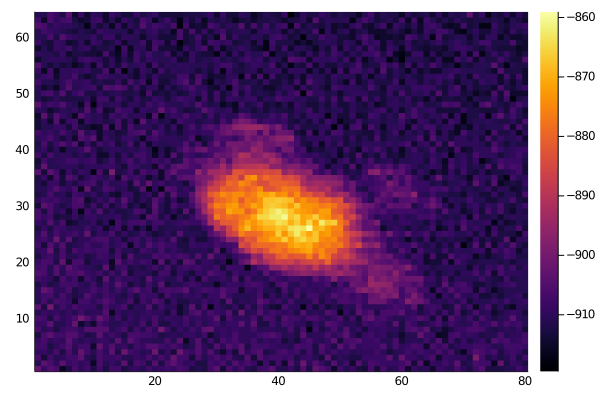

In [10]:
heatmap(afm_frames[100])

In [11]:
#r = getafmposterior(asd.frames[11].data, model_array, q_array, param_array)
r = getafmposteriors_alpha(afm_frames, model_array, q_array, param_array)

func is fft_convolution
model_id = 1
model_id = 2
model_id = 3
model_id = 4
model_id = 5
model_id = 6
model_id = 7
model_id = 8
model_id = 9
model_id = 10
model_id = 11
model_id = 12
model_id = 13
model_id = 14
model_id = 15
model_id = 16
model_id = 17
model_id = 18
model_id = 19
model_id = 20
model_id = 21
model_id = 22
model_id = 23
model_id = 24
model_id = 25


100-element Array{Any,1}:
 MDToolbox.posteriorResult([2.181199976176669e-289 0.0 … 0.0 3.4865748523676e-311; 4.905561978678945e-295 9.516767998905916e-308 … 2.4429209880789165e-263 3.920395592549567e-204; … ; 1.6902765376627832e-297 1.211165082966441e-267 … 1.4156443885226786e-214 6.0866071704396376e-232; 0.0 0.0 … 2.4998413397427006e-292 1.300271190743335e-268], [-10983.52723384442, -11019.124581934462, -10929.703722458551, -10944.588375255611, -10927.465440439337, -10919.416556657292, -10938.502167508967, -10940.860356453471, -11005.270837812059, -10999.761012192394  …  -10935.521150272383, -10905.894242799273, -10949.203961884705, -10913.799246686074, -10919.019284673675, -10959.783094665894, -10954.317621816954, -10887.624234847943, -10970.761695873414, -10887.890552933037], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.

In [12]:
using JLD2
@save "tmp.jld2" r

┌ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
└ @ Base loading.jl:1260


In [18]:
ta = r[1].best_model_rotated
for i = 2:length(r)
    ta = [ta; r[i].best_model_rotated];
end
writepdb("best_model_rotated.pdb", ta);

┌ Info: Saved animation to 
│   fn = /data/yasu/MDToolbox.jl/notebook/afm_input.gif
└ @ Plots /opt/julia_depot/packages/Plots/EJmJT/src/animation.jl:102


Plots.AnimatedGif("/data/yasu/MDToolbox.jl/notebook/afm_input.gif")
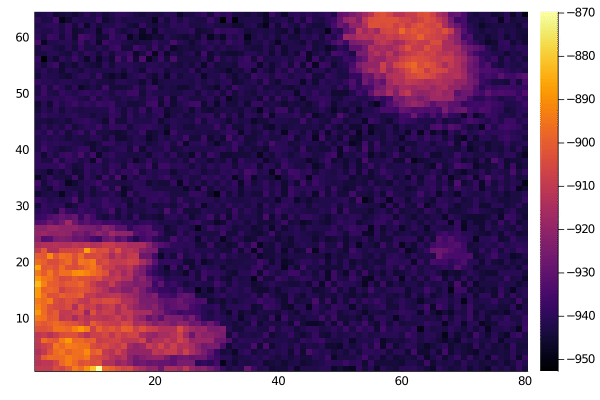

In [20]:
afm_input = afm_frames

anim = @animate for i = 1:length(afm_input)
    heatmap(afm_input[i])
end
gif(anim, "afm_input.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /data/yasu/MDToolbox.jl/notebook/afm_output.gif
└ @ Plots /opt/julia_depot/packages/Plots/EJmJT/src/animation.jl:102


Plots.AnimatedGif("/data/yasu/MDToolbox.jl/notebook/afm_output.gif")
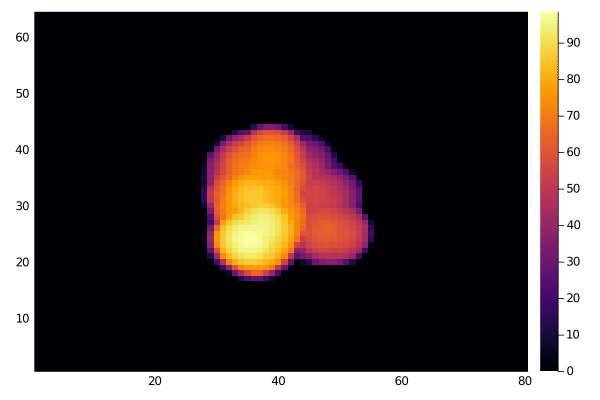

In [21]:
anim = @animate for i = 1:length(r)
    heatmap(r[i].best_afm)
end
gif(anim, "afm_output.gif", fps = 10)